# Predicting The Popularity of Kendrick Lamar's Tracks on Spotify


# Loading the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [4]:
#load dataset
Kendrick_data = 'all_kendrick_tracks.csv'
df = pd.read_csv(Kendrick_data)
df.head()

,artist_name,track_name,album_name,release_date,explicit,popularity,track_id,duration_ms,album_artwork_url,danceability,...,tempo,loudness,speechiness,acousticness,instrumentalness,liveness,is_album_track,is_feature,release_year,duration_min
0,Kendrick Lamar,wacced out murals,GNX,2024-11-22,True,81,5gOfC9UzZQzTyShqPMrpjT,317092,https://i.scdn.co/image/ab67616d00001e02d99850...,0.761,...,81.998,-10.759,0.459,0.24900,0.000000,0.1360,True,False,2024,5.284867
1,Kendrick Lamar,squabble up,GNX,2024-11-22,True,81,0nj9Bq5sHDiTxSHunhgkFb,157992,https://i.scdn.co/image/ab67616d00001e02d99850...,0.874,...,103.921,-5.568,0.198,0.02060,0.000000,0.0783,True,False,2024,2.633200
2,Kendrick Lamar,luther (with sza),GNX,2024-11-22,False,81,45J4avUb9Ni0bnETYaYFVJ,177598,https://i.scdn.co/image/ab67616d00001e02d99850...,0.707,...,138.008,-7.546,0.125,0.25100,0.000000,0.2480,True,False,2024,2.959967
3,Kendrick Lamar,man at the garden,GNX,2024-11-22,True,79,5ho7VSXSmI2KM2nDjcnLyz,233173,https://i.scdn.co/image/ab67616d00001e02d99850...,0.817,...,91.997,-10.213,0.290,0.51000,0.000119,0.1100,True,False,2024,3.886217
4,Kendrick Lamar,hey now (feat. dody6),GNX,2024-11-22,True,79,5S8VwnB4sLi6W0lYTWYylu,217478,https://i.scdn.co/image/ab67616d00001e02d99850...,0.806,...,102.011,-8.769,0.117,0.00443,0.001620,0.4120,True,False,2024,3.624633


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist_name        305 non-null    object 
 1   track_name         305 non-null    object 
 2   album_name         305 non-null    object 
 3   release_date       305 non-null    object 
 4   explicit           305 non-null    bool   
 5   popularity         305 non-null    int64  
 6   track_id           305 non-null    object 
 7   duration_ms        305 non-null    int64  
 8   album_artwork_url  305 non-null    object 
 9   danceability       305 non-null    float64
 10  energy             305 non-null    float64
 11  valence            305 non-null    float64
 12  tempo              305 non-null    float64
 13  loudness           305 non-null    float64
 14  speechiness        305 non-null    float64
 15  acousticness       305 non-null    float64
 16  instrumentalness   305 non

# Exploratory Data Analysis

In [6]:
# Calculate the mean of specified columns
mean_popularity = df['popularity'].mean()
mean_danceability = df['danceability'].mean()
mean_energy = df['energy'].mean()
mean_valence = df['valence'].mean()
mean_tempo = df['tempo'].mean()
mean_loudness = df['loudness'].mean()
mean_speechiness = df['speechiness'].mean()
mean_acousticness = df['acousticness'].mean()
mean_instrumentalness = df['instrumentalness'].mean()
mean_liveness = df['liveness'].mean()

# Print the calculated means
print(f"Mean Popularity: {mean_popularity}")
print(f"Mean Danceability: {mean_danceability}")
print(f"Mean Energy: {mean_energy}")
print(f"Mean Valence: {mean_valence}")
print(f"Mean Tempo: {mean_tempo}")
print(f"Mean Loudness: {mean_loudness}")
print(f"Mean Speechiness: {mean_speechiness}")
print(f"Mean Acousticness: {mean_acousticness}")
print(f"Mean Instrumentalness: {mean_instrumentalness}")
print(f"Mean Liveness: {mean_liveness}")

Mean Popularity: 42.704918032786885
Mean Danceability: 0.6478327868852459
Mean Energy: 0.6726065573770491
Mean Valence: 0.47981409836065575
Mean Tempo: 118.3846262295082
Mean Loudness: -7.128665573770491
Mean Speechiness: 0.25799901639344264
Mean Acousticness: 0.22737266885245905
Mean Instrumentalness: 0.0017375641967213114
Mean Liveness: 0.24572590163934424


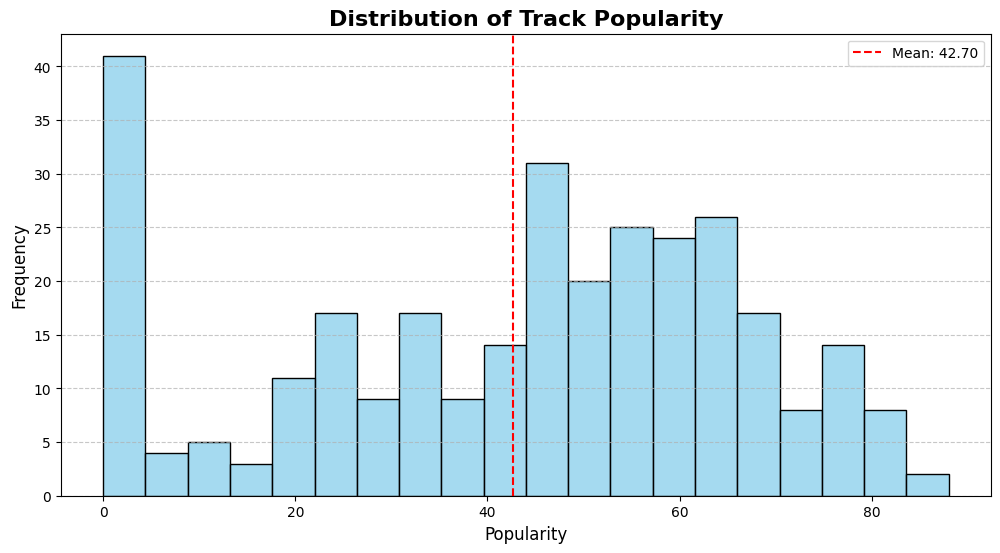

In [8]:
#Histogram to show Distribution of Track Popularity

plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], kde=False, bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Track Popularity', fontsize=16, fontweight='bold')
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize the ticks and labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a vertical line for the mean popularity
plt.axvline(df['popularity'].mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {df["popularity"].mean():.2f}')

# Show legend
plt.legend(fontsize=10)

plt.show()

In [60]:
# Calculate the variance and standard deviation of popularity
popularity_variance = df['popularity'].var()
popularity_std_dev = df['popularity'].std()

# Print the results
print(f"Variance of Popularity: {popularity_variance}")
print(f"Standard Deviation of Popularity: {popularity_std_dev}")

Variance of Popularity: 576.6165875754964
Standard Deviation of Popularity: 24.012842138645237


<ipython-input-58-3e05e70dc1d9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='track_name', data=df_sorted.head(20), palette="viridis") # Show top 20


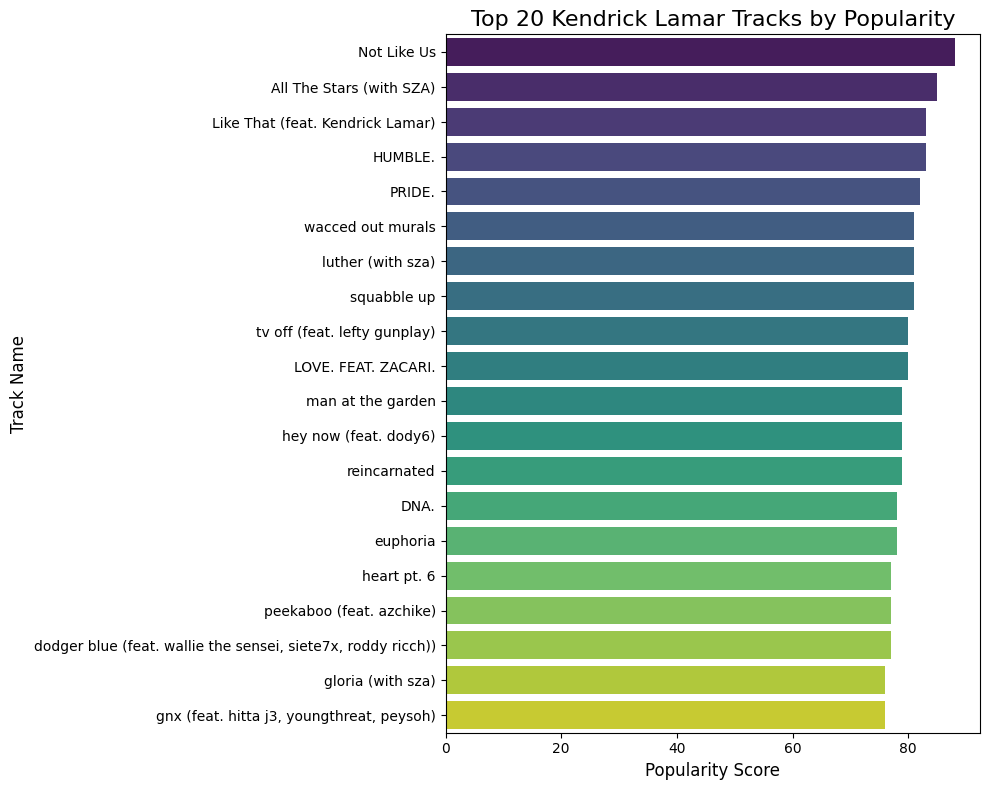

In [58]:
#Top 20 Tracks by Popularity

# Sort the DataFrame by popularity in descending order
df_sorted = df.sort_values('popularity', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
# Use 'track_name' instead of 'name' for the y-axis
sns.barplot(x='popularity', y='track_name', data=df_sorted.head(20), palette="viridis") # Show top 20
plt.title('Top 20 Kendrick Lamar Tracks by Popularity', fontsize=16)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Track Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

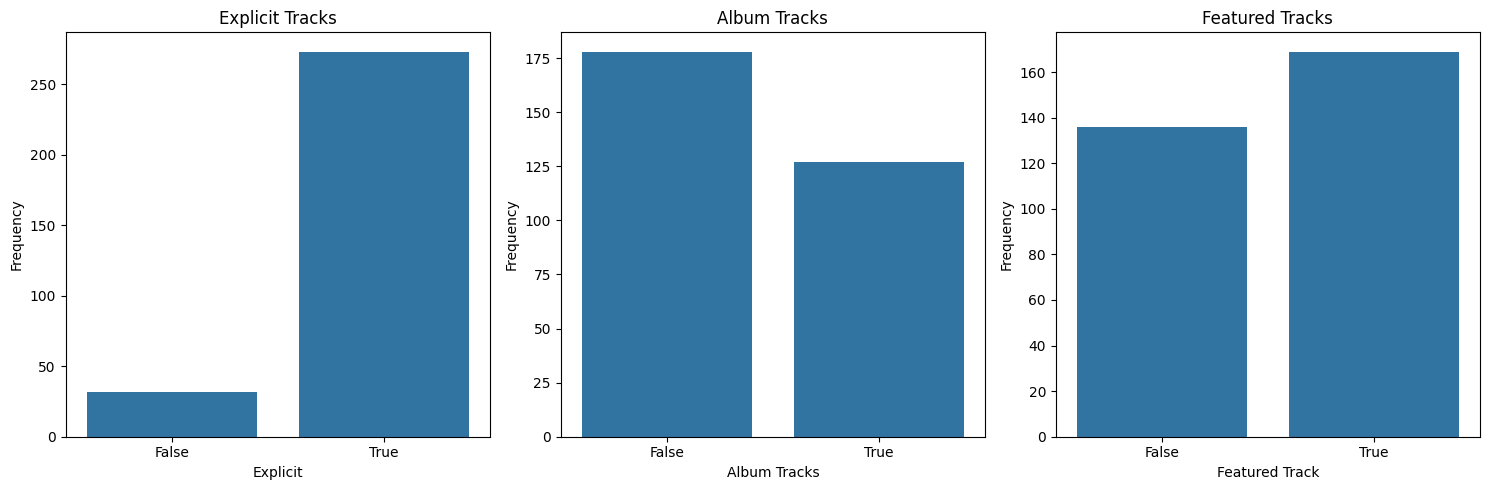

In [9]:
#Creating Bar Graphs for Categorical Variables

# Create bar plots for 'explicit', 'is_album_track', and 'is_feature'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='explicit', data=df)
plt.title('Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.countplot(x='is_album_track', data=df)
plt.title('Album Tracks')
plt.xlabel('Album Tracks')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.countplot(x='is_feature', data=df)
plt.title('Featured Tracks')
plt.xlabel('Featured Track')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

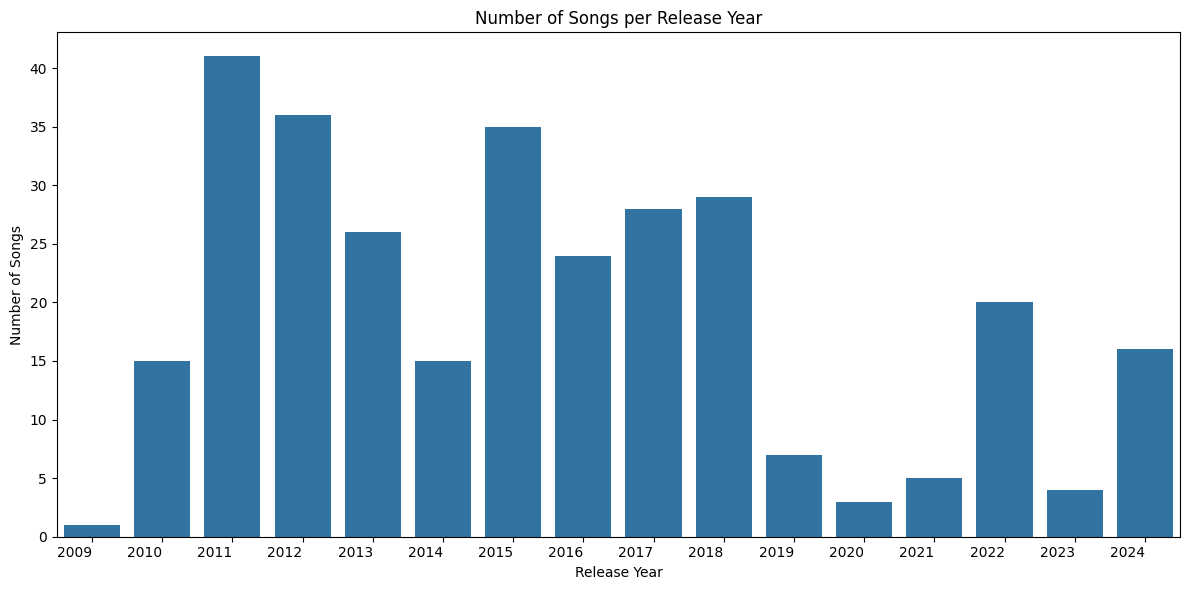

In [59]:
# Bar Plot of Release Year

plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=df)
plt.title('Number of Songs per Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

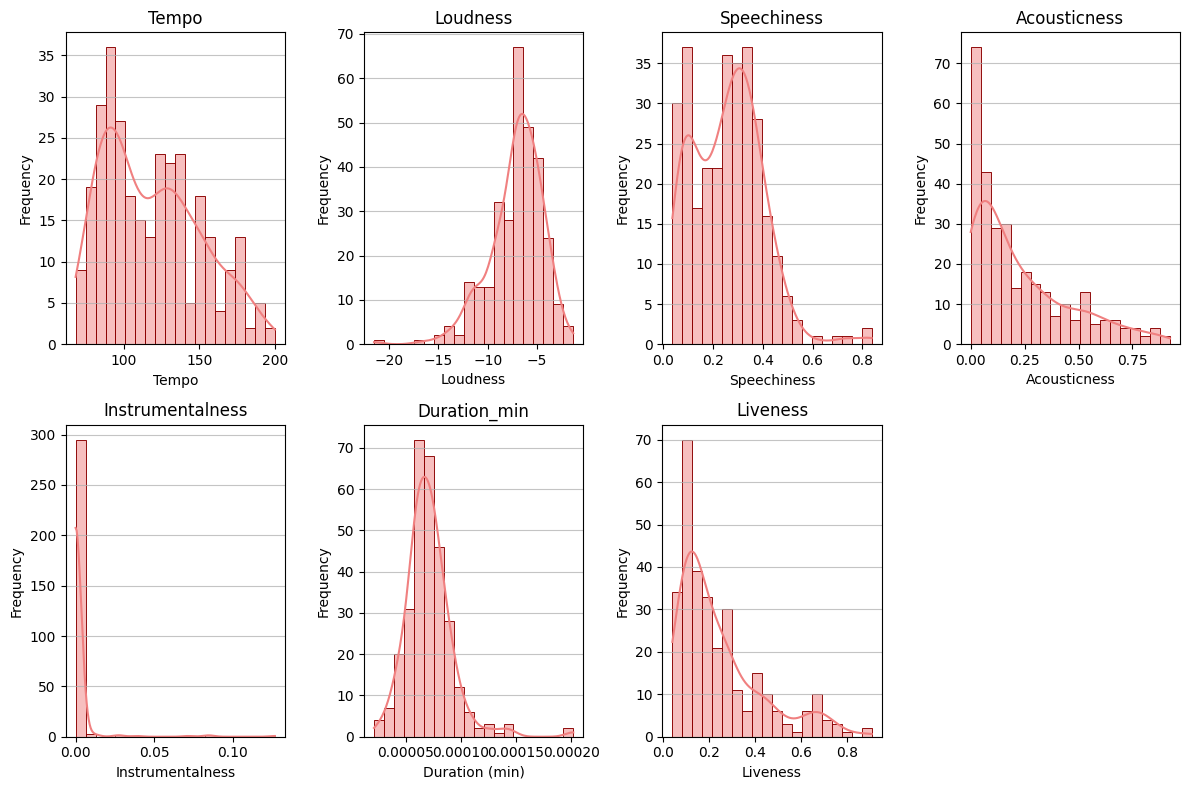

In [62]:
#Histograms for Numeric Variables

def create_histogram(data, column_name, title):
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column_name], kde=True, bins=20, color='lightblue', edgecolor='darkblue')
    plt.title(title, fontsize=14)
    plt.xlabel(column_name.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axvline(data[column_name].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {data[column_name].mean():.2f}')
    plt.legend(fontsize=10)
    plt.show()

columns = ['tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'duration_min', 'liveness']

plt.figure(figsize=(12, 8))

for i, col in enumerate(columns):
    plt.subplot(2, 4, i + 1)
    if col == 'duration_min':
      sns.histplot(df[col] / 60000, kde=True, bins=20, color='lightcoral', edgecolor='darkred')
      plt.xlabel('Duration (min)')
    else:
      sns.histplot(df[col], kde=True, bins=20, color='lightcoral', edgecolor='darkred')
      plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.title(col.capitalize())
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### Bivariate Analysis

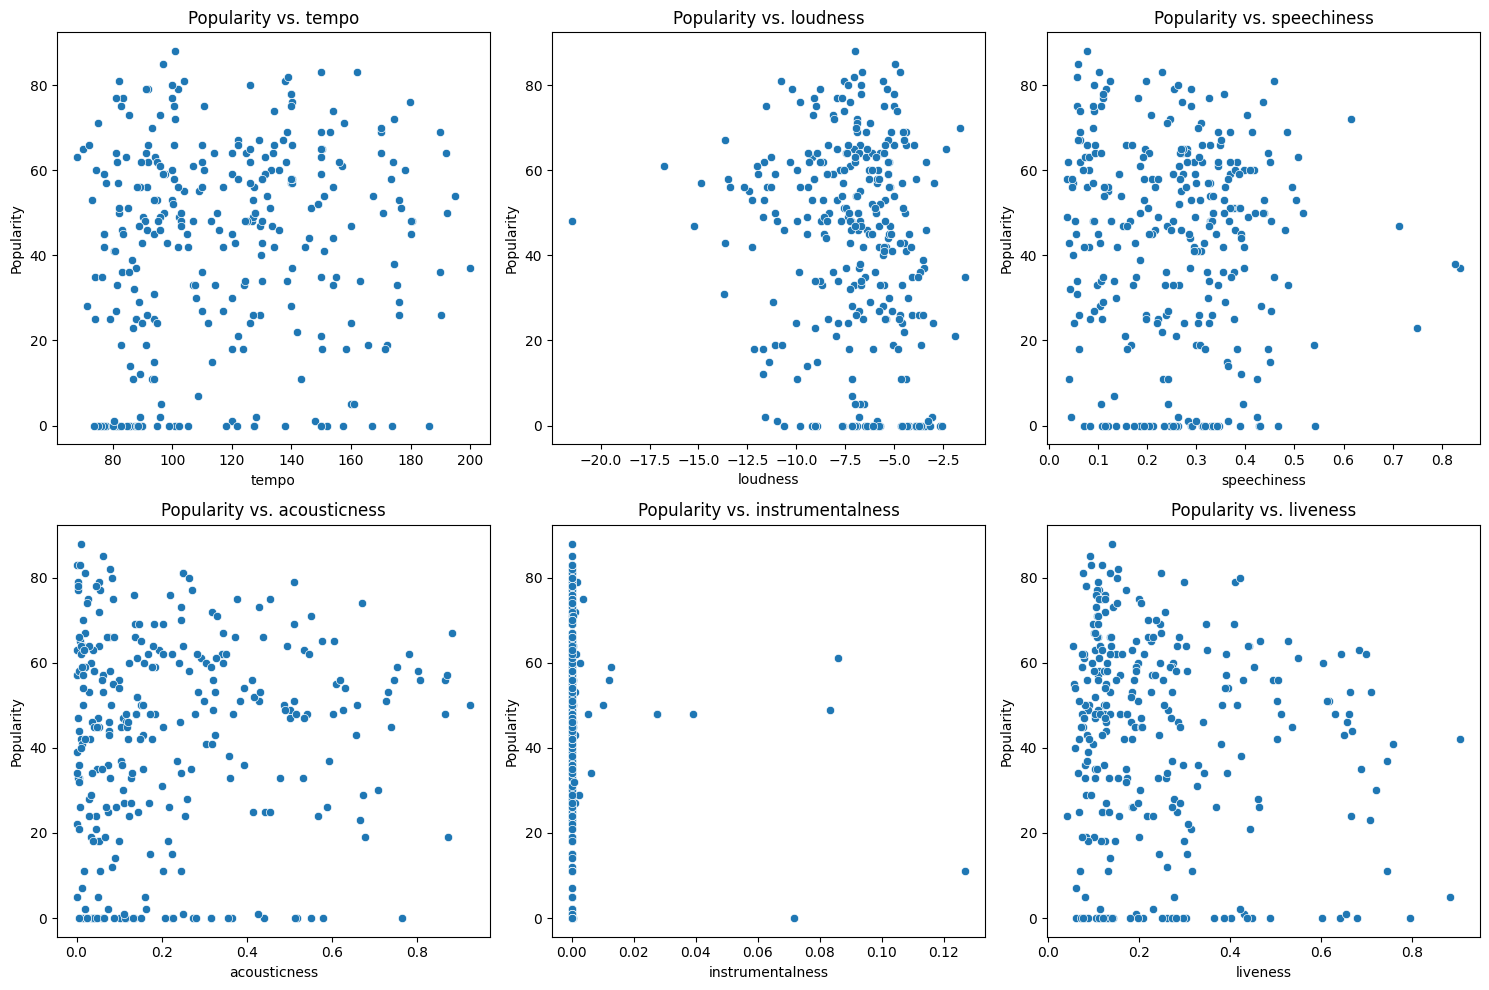

In [11]:
# draw scatter plots of popularity vs tempo, popularity vs loudness, popularity vs speechiness, popularity  vs acousticness, popularity vs instrumentalness, popularity vs liveness

features = ['tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=feature, y='popularity', data=df)
    plt.title(f'Popularity vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

Data Types Before Conversion:
popularity            int64
duration_min        float64
danceability        float64
energy              float64
tempo               float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
dtype: object
Data Types After Conversion:
popularity            int64
duration_min        float64
danceability        float64
energy              float64
tempo               float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
dtype: object
Correlation Matrix:
                  popularity  duration_min  danceability    energy     tempo  \
popularity          1.000000     -0.032258      0.226185 -0.289820  0.107871   
duration_min       -0.032258      1.000000     -0.180332  0.059585 -0.057637   
danceability        0.226185     -0.180332      1.000000 -0.198213 -0.019655   
energy       

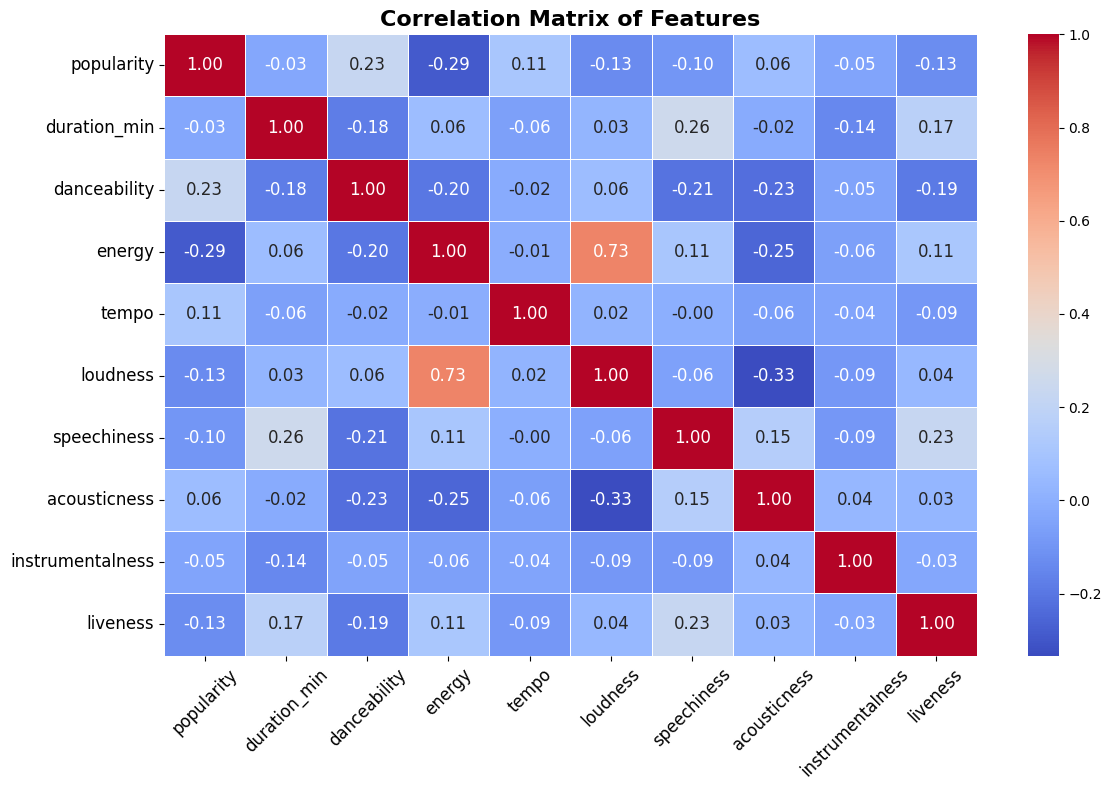

In [12]:
#Correlation Matrix

# Select relevant columns for correlation
cols_for_correlation = ['popularity', 'duration_min', 'danceability', 'energy', 'tempo',
                        'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

# Check data types
print("Data Types Before Conversion:")
print(df[cols_for_correlation].dtypes)

# Convert columns to numeric, coercing errors to NaN
for col in cols_for_correlation:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts non-numeric values to NaN

# Drop rows with NaN values in the selected columns
df = df.dropna(subset=cols_for_correlation)

# Check data types after conversion
print("Data Types After Conversion:")
print(df[cols_for_correlation].dtypes)

# Calculate the correlation matrix
correlation_matrix = df[cols_for_correlation].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 12})
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

# Predictive Modeling


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

# Baseline Model

In [14]:
#set up baseline model using mean imbd score, calculate baseline mse
y = df['popularity']
baseline_preds = np.ones(len(y))*y.mean()
mean_squared_error(y, baseline_preds)

574.726041386724

# Multiple Regression

In [15]:
#create X & y, split into training and testing data
X = df[['energy', 'danceability', 'tempo', 'liveness', 'explicit', 'is_album_track', 'is_feature', 'release_year']]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [16]:
#encode categorical column
cat_col = ['is_album_track', 'is_feature']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [17]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

In [18]:
#fit pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['is_album_track',
                                                   'is_feature'])])),
                ('model', LinearRegression())])

In [19]:
#find coefficients
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coefficients, names)

,0
onehotencoder__is_album_track_True,1.561943
onehotencoder__is_feature_True,-19.825227
remainder__energy,-13.657196
remainder__danceability,20.090580
remainder__tempo,0.110346
remainder__liveness,-8.751048
remainder__explicit,-1.500422
remainder__release_year,1.956048


In [20]:
#find y-int
lr.intercept_

-3902.946200006605

In [21]:
#calculate mse for training data
y_train_preds = pipe.predict(X_train)
mean_squared_error(y_train, y_train_preds)

329.7811643173492

In [22]:
#calculate mse for testing data
y_test_preds = pipe.predict(X_test)
mean_squared_error(y_test, y_test_preds)

324.5223158478872

In [23]:
 #determine feature importance
r = permutation_importance(pipe, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
energy,0.020997
danceability,0.041897
tempo,-0.043339
liveness,-0.017427
explicit,-0.002502
is_album_track,0.005092
is_feature,0.464693
release_year,0.112485


# K-Nearest Neighbors Regression Model

In [24]:
#create X & y, split into training and testing data
X = df[['energy', 'danceability', 'tempo', 'liveness', 'explicit', 'is_album_track', 'is_feature', 'release_year']]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [25]:
#encode categorical column
cat_col = ['is_album_track', 'is_feature']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [26]:
#create pipeline for knn regression model
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

In [27]:
#define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]}

In [28]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['is_album_track',
                                                                          'is_feature'])])),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 25, 30, 50]},
             scoring='neg_mean_squared_error')

In [29]:
#determine best parameter
grid_search.best_params_

{'model__n_neighbors': 25}

In [30]:
#use 25 neighbors in model
knn = grid_search.best_estimator_

In [31]:
#calculate mse for training data
y_train_preds = knn.predict(X_train)
mean_squared_error(y_train, y_train_preds)

495.31388852459014

In [52]:
#calculate mse for testing data
y_test_preds = knn.predict(X_test)
mean_squared_error(y_test, y_test_preds)

467.13206557377055

In [32]:
#determine feature importance
r = permutation_importance(knn, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
energy,0.000458
danceability,0.000234
tempo,0.055677
liveness,0.001212
explicit,0.000094
is_album_track,0.003925
is_feature,0.003945
release_year,0.154103


# Decision Tree Regression Model

In [33]:
#create X & y, split into training and testing data
X = df[['energy', 'danceability', 'tempo', 'liveness', 'explicit', 'is_album_track', 'is_feature', 'release_year']]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [34]:
#encode categorical column
cat_col = ['is_album_track', 'is_feature']
ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,cat_col), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

Text(0.5, 1.0, 'Decision Tree Depth vs. Test/Train Accuracy')

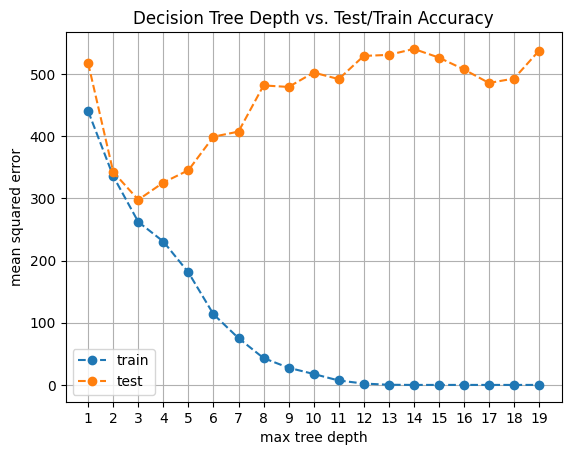

In [35]:
#find the optimal max depth while avoiding overfitting by plotting the test accuracies & finding the minimum one
train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth = d).fit(X_train_encoded, y_train)
    y_train_preds = dtree.predict(X_train_encoded)
    y_test_preds = dtree.predict(X_test_encoded)
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores, '--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('mean squared error')
plt.title('Decision Tree Depth vs. Test/Train Accuracy')

In [36]:
#fit a decision tree model with a max depth = 3 (lowest mse test score on graph)
dtree = DecisionTreeRegressor(max_depth = 3).fit(X_train_encoded, y_train)

[Text(0.5, 0.875, 'release_year <= 2015.5\nsquared_error = 602.496\nsamples = 244\nvalue = 42.127'),
 Text(0.25, 0.625, 'is_feature_False <= 0.5\nsquared_error = 482.75\nsamples = 135\nvalue = 30.681'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'energy <= 0.921\nsquared_error = 451.833\nsamples = 90\nvalue = 23.011'),
 Text(0.0625, 0.125, 'squared_error = 445.023\nsamples = 81\nvalue = 25.296'),
 Text(0.1875, 0.125, 'squared_error = 43.136\nsamples = 9\nvalue = 2.444'),
 Text(0.375, 0.375, 'release_year <= 2014.5\nsquared_error = 191.577\nsamples = 45\nvalue = 46.022'),
 Text(0.3125, 0.125, 'squared_error = 55.782\nsamples = 30\nvalue = 54.467'),
 Text(0.4375, 0.125, 'squared_error = 35.316\nsamples = 15\nvalue = 29.133'),
 Text(0.75, 0.625, 'is_feature_True <= 0.5\nsquared_error = 387.606\nsamples = 109\nvalue = 56.303'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'release_year <= 2023.0\nsquared_error = 130.713\nsamples = 58\nvalue = 65.103'),
 Text(0.5625, 0.125, 'sq

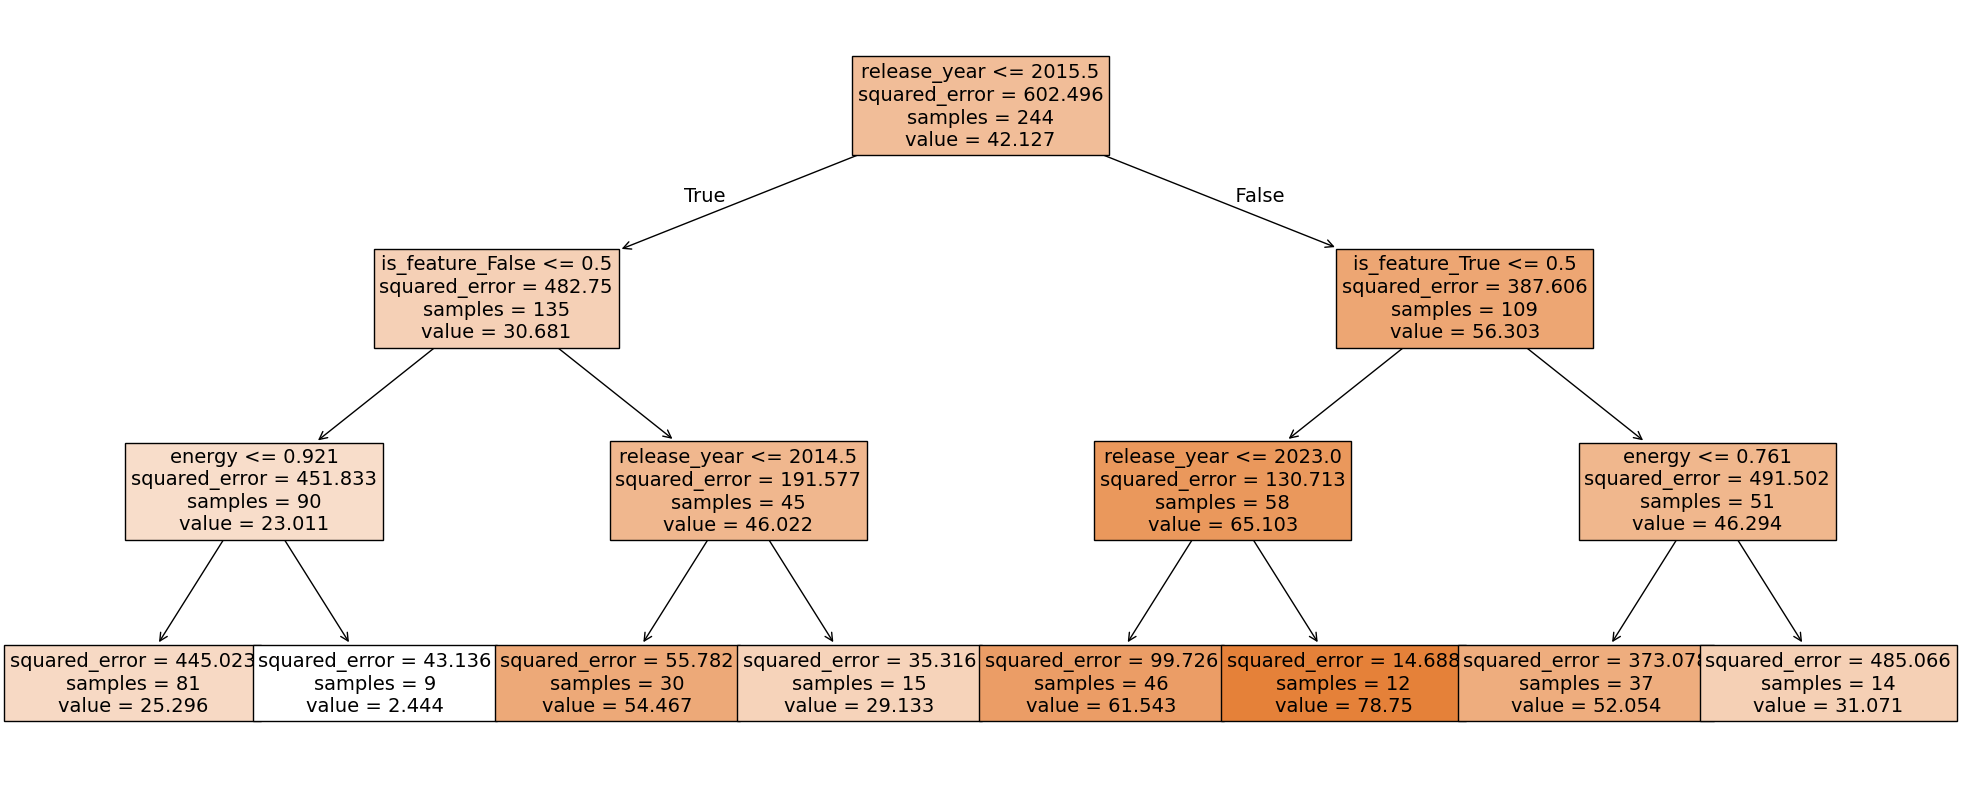

In [37]:
#plot the tree
plt.figure(figsize=(25, 10))
plot_tree(dtree, filled=True, feature_names=encoder.get_feature_names_out().tolist(), fontsize=14)

In [38]:
#calculate mse for training data
y_train_preds = dtree.predict(X_train_encoded)
mean_squared_error(y_train, y_train_preds)

262.2819451553682

In [39]:
#calculate mse for testing data
y_test_preds = dtree.predict(X_test_encoded)
mean_squared_error(y_test, y_test_preds)

297.9381237814418

In [40]:
#determine feature importance
r = permutation_importance(dtree, X_test_encoded, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = encoder.get_feature_names_out().tolist())

,0
is_album_track_False,0.000000
is_album_track_True,0.000000
is_feature_False,0.335513
is_feature_True,0.299341
energy,0.029304
danceability,0.000000
tempo,0.000000
liveness,0.000000
explicit,0.000000
release_year,0.191597


# Random Forest Regression Model

In [41]:
#create X & y, split into training and testing data
X = df[['energy', 'danceability', 'tempo', 'liveness', 'explicit', 'is_album_track', 'is_feature', 'release_year']]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [42]:
#encode categorical column
cat_col = ['is_album_track', 'is_feature']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = 'passthrough')

In [43]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor())])

In [44]:
#define grid of hyperparameters for number of estimators and max depth
param_grid = {'model__n_estimators': [50, 100, 150, 200],'model__max_depth': [3, 4, 5, 6, 10]}

In [45]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['is_album_track',
                                                                          'is_feature'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [3, 4, 5, 6, 10],
                         'model__n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [46]:
#determine best parameters
grid_search.best_params_

{'model__max_depth': 10, 'model__n_estimators': 200}

In [47]:
#use max depth of 10 & 200 estimators in model
forest = grid_search.best_estimator_

In [48]:
#calculate mse for training data
y_train_preds = forest.predict(X_train)
mean_squared_error(y_train, y_train_preds)

51.37617505480249

In [49]:
#calculate mse for testing data
y_test_preds = forest.predict(X_test)
mean_squared_error(y_test, y_test_preds)

262.20514163535404

In [50]:
#determine feature importance
r = permutation_importance(forest, X_test, y_test, n_repeats = 10)
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist())

,0
energy,0.029008
danceability,0.020060
tempo,0.072276
liveness,0.068036
explicit,0.003097
is_album_track,0.013076
is_feature,0.573074
release_year,0.236210
